# An introduction to sktime
https://github.com/alan-turing-institute/sktime

---
## A––Cross-sectional classification with scikit-learn

### A.1––Data

In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wine = load_wine()
X = wine["data"] 
y = wine["target"]
print(X.shape, y.shape)

(178, 13) (178,)


In [3]:
pd.DataFrame(X, columns=wine["feature_names"]).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
labels, counts = np.unique(y, return_counts=True)
counts

array([59, 71, 48])

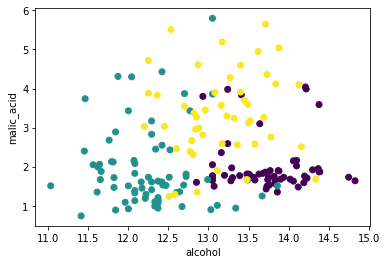

In [5]:
fig, ax = plt.subplots(1)
ax.scatter(X[:, 0], X[:, 1], c=y)
ax.set(xlabel=wine["feature_names"][0], ylabel=wine["feature_names"][1]);

### A.2––Learning process

Common interface for:
* Model specification
* Fitting
* Prediction

In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(133, 13) (45, 13) (133,) (45,)


In [8]:
classifier = RandomForestClassifier(n_estimators=10, n_jobs=10)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=10, n_jobs=10)

In [9]:
y_pred = classifier.predict(X_test)

### A.3––Evaluation

In [10]:
accuracy_score(y_test, y_pred)

0.9555555555555556

### A.3––Composition
* Pipelining & transformers
* Tuning
* Ensembling

In [11]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [12]:
pipeline = make_pipeline(StandardScaler(), RandomForestClassifier())
pipeline

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier', RandomForestClassifier())])

In [13]:
pipeline.fit(X_train, y_train)
pipeline.predict(X_test)
accuracy_score(y_test, y_pred)

0.9555555555555556

---
## B––Scientific typing

* How can we generalize the design principles of scikit-learn and other state-of-the-art toolboxes for cross-sectional data to the time series domain?  
* What are meaningful categories for algorithms in ML toolboxes?
* How do we encapsulate them? 
* How do we define their interfaces?

In [14]:
# cross-sectional classification algorithm
from sklearn.base import is_classifier
is_classifier(RandomForestClassifier())

True

### B.1––Learning tasks 

* Data (relational structure and assumed statistical data-generative setting)
* Learning process (at what point does the algorithm take in what data and what does it return?)
* Evaluation (how do we know we have solved the task)

### B.2––Scientific types for learning algorithms
* counterparts to learning tasks

In [15]:
import inspect

def _is_public_method(method):
    return inspect.ismethod(method) and not method.__name__.startswith("_")

In [16]:
[name for name, method in inspect.getmembers(RandomForestClassifier(), predicate=_is_public_method)]

['apply',
 'decision_path',
 'fit',
 'get_params',
 'predict',
 'predict_log_proba',
 'predict_proba',
 'score',
 'set_params']

In [17]:
# inheritance
[klass.__name__ for klass in inspect.getmro(RandomForestClassifier)]

['RandomForestClassifier',
 'ForestClassifier',
 'ClassifierMixin',
 'BaseForest',
 'MultiOutputMixin',
 'BaseEnsemble',
 'MetaEstimatorMixin',
 'BaseEstimator',
 'object']

In [18]:
from sklearn.base import BaseEstimator
[name for name, method in inspect.getmembers(BaseEstimator(), predicate=_is_public_method)]

['get_params', 'set_params']

Find out more: https://arxiv.org/pdf/2101.04938.pdf

---
## C––Time series classification with sktime

### C.1––Data

In [19]:
from sktime.datasets import load_arrow_head
from sktime.utils.data_processing import from_nested_to_3d_numpy

X, y = load_arrow_head(return_X_y=True)
X = from_nested_to_3d_numpy(X)

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(158, 1, 251) (158,) (53, 1, 251) (53,)


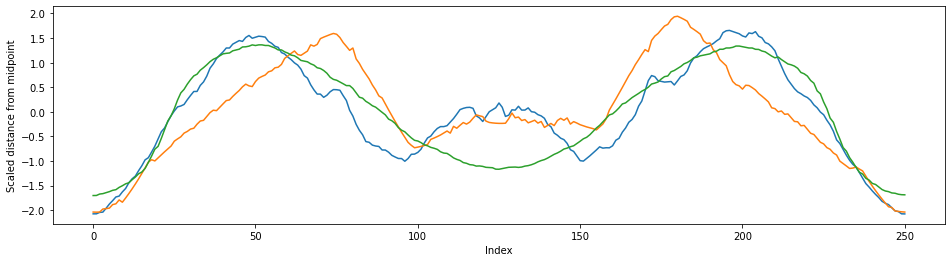

In [20]:
labels, counts = np.unique(y_train, return_counts=True)
fig, ax = plt.subplots(1, figsize=plt.figaspect(0.25))
for label in labels:
    ax.plot(X_train[y_train == label, 0, :][0], label=f"class {label}")
ax.set(ylabel="Scaled distance from midpoint", xlabel="Index");

### C.2––Learning process

In [21]:
from sktime.classification.shapelet_based import ROCKETClassifier

In [22]:
# time-series classification algorithm 
classifier = ROCKETClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

ROCKETClassifier()

### C.3––Evaluation

In [23]:
accuracy_score(y_test, y_pred)

1.0

In [24]:
from sktime.utils import all_estimators
[name for name, klass in all_estimators("classifier")]

['BOSSEnsemble',
 'ColumnEnsembleClassifier',
 'ComposableTimeSeriesForestClassifier',
 'ContractableBOSS',
 'ElasticEnsemble',
 'HIVECOTEV1',
 'IndividualBOSS',
 'IndividualTDE',
 'KNeighborsTimeSeriesClassifier',
 'MUSE',
 'MrSEQLClassifier',
 'ProximityForest',
 'ProximityStump',
 'ProximityTree',
 'ROCKETClassifier',
 'RandomIntervalSpectralForest',
 'ShapeDTW',
 'ShapeletTransformClassifier',
 'SupervisedTimeSeriesForest',
 'TemporalDictionaryEnsemble',
 'TimeSeriesForestClassifier',
 'WEASEL']

---
## D––Forecasting with sktime

### D.1––Data

In [25]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series

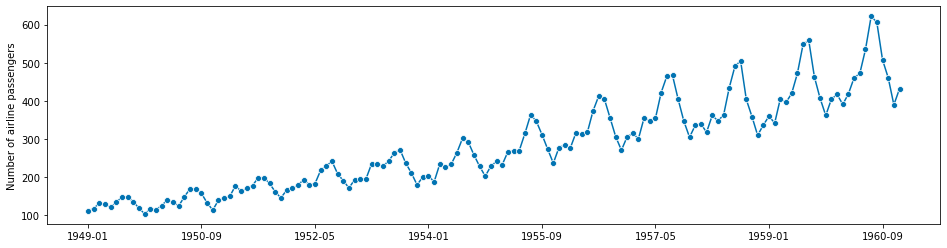

In [26]:
y = load_airline()
plot_series(y);

### D.2––Learning process

* Temporal dependency in data
* Forecasting horizon

In [27]:
from sktime.forecasting.model_selection import temporal_train_test_split

fh = np.arange(12) + 1
y_train, y_test = temporal_train_test_split(y, fh=fh)
print(y_train.shape, y_test.shape)

(132,) (12,)


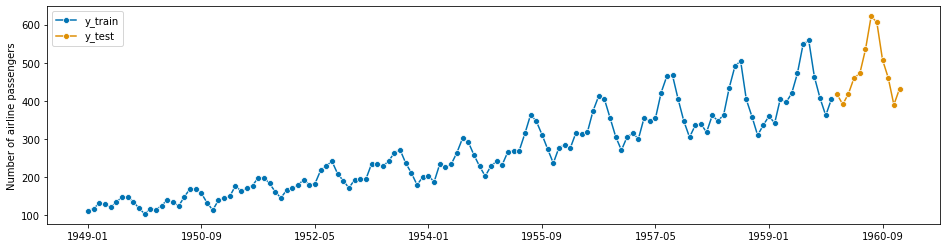

In [28]:
plot_series(y_train, y_test, labels=["y_train", "y_test"]);

In [30]:
from sktime.forecasting.naive import NaiveForecaster

In [31]:
forecaster = NaiveForecaster(strategy="last", sp=12)
forecaster.fit(y_train)

NaiveForecaster(sp=12, strategy='last', window_length=None)

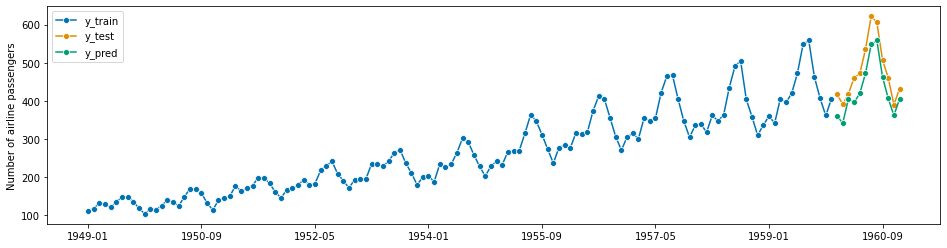

In [32]:
y_pred = forecaster.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

Overview of forecasting algorithms:

In [29]:
[name for name, klass in all_estimators("forecaster")]

['ARIMA',
 'AutoARIMA',
 'AutoETS',
 'BATS',
 'DirRecTabularRegressionForecaster',
 'DirRecTimeSeriesRegressionForecaster',
 'DirectTabularRegressionForecaster',
 'DirectTimeSeriesRegressionForecaster',
 'EnsembleForecaster',
 'ExponentialSmoothing',
 'ForecastingGridSearchCV',
 'ForecastingRandomizedSearchCV',
 'HCrystalBallForecaster',
 'MultioutputTabularRegressionForecaster',
 'MultioutputTimeSeriesRegressionForecaster',
 'MultiplexForecaster',
 'NaiveForecaster',
 'OnlineEnsembleForecaster',
 'PolynomialTrendForecaster',
 'Prophet',
 'RecursiveTabularRegressionForecaster',
 'RecursiveTimeSeriesRegressionForecaster',
 'StackingForecaster',
 'TBATS',
 'ThetaForecaster',
 'TransformedTargetForecaster']

### D.3––Evaluation

In [33]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, y_pred)

0.09987532920823484

### D.4––Composition
* Ensembling
* Pipelining & transformers
* Tuning
* Reduction

In [34]:
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.boxcox import BoxCoxTransformer
from sktime.transformations.series.detrend import Detrender
from sktime.forecasting.trend import PolynomialTrendForecaster

In [35]:
pipeline = TransformedTargetForecaster([
    ("boxcox", BoxCoxTransformer()),
    ("detrend", Detrender(PolynomialTrendForecaster())),
    ("forecaster", NaiveForecaster(sp=12)),
])
pipeline.fit(y_train)

TransformedTargetForecaster(steps=[('boxcox',
                                    BoxCoxTransformer(bounds=None,
                                                      method='mle')),
                                   ('detrend',
                                    Detrender(forecaster=PolynomialTrendForecaster(degree=1,
                                                                                   regressor=None,
                                                                                   with_intercept=True))),
                                   ('forecaster',
                                    NaiveForecaster(sp=12, strategy='last',
                                                    window_length=None))])

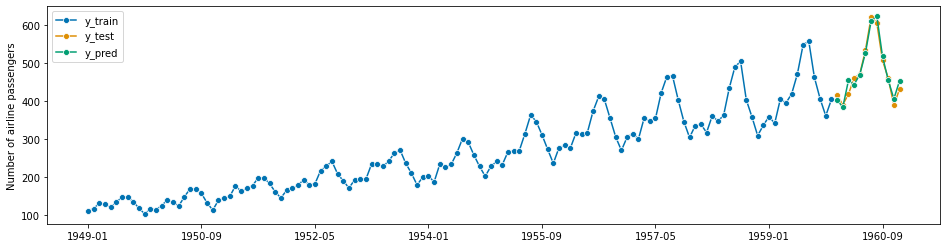

In [36]:
y_pred = pipeline.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

---
## E––Reduction

![](https://i.imgur.com/u0YlHYU.png)

#### Example: Reduction from forecasting to cross-sectional regression 
Following arrows (b), (d) and (g)
![](https://i.imgur.com/7OSd7K8.png)

In [37]:
from sktime.forecasting.compose import make_reduction
from sklearn.neighbors import KNeighborsRegressor

In [38]:
reduction = make_reduction(KNeighborsRegressor(n_neighbors=1), strategy="recursive", window_length=12)
reduction

RecursiveTabularRegressionForecaster(estimator=KNeighborsRegressor(algorithm='auto',
                                                                   leaf_size=30,
                                                                   metric='minkowski',
                                                                   metric_params=None,
                                                                   n_jobs=None,
                                                                   n_neighbors=1,
                                                                   p=2,
                                                                   weights='uniform'),
                                     step_length=1, window_length=12)

In [39]:
reduction.fit(y_train)

RecursiveTabularRegressionForecaster(estimator=KNeighborsRegressor(algorithm='auto',
                                                                   leaf_size=30,
                                                                   metric='minkowski',
                                                                   metric_params=None,
                                                                   n_jobs=None,
                                                                   n_neighbors=1,
                                                                   p=2,
                                                                   weights='uniform'),
                                     step_length=1, window_length=12)

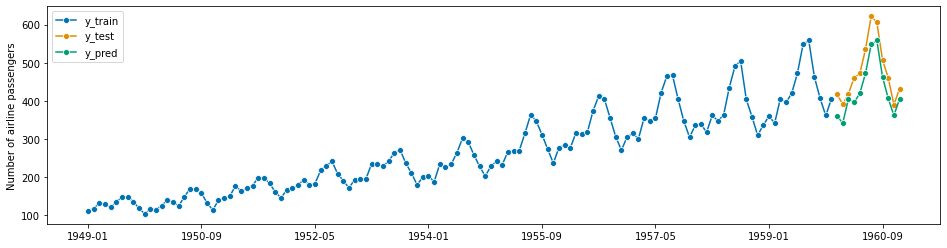

In [40]:
y_pred = reduction.predict(fh)
plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"]);

---
## Vision

![](https://i.imgur.com/JGcclfB.png)

## Roadmap

* More tasks (annotation, clustering, time-series regression, multivariate forecasting, panel forecasting, supervised forecasting)
* More algorithms (deep-learning, composition, reduction)
* Documentation



## Getting involved

* [all-contributors](https://github.com/alan-turing-institute/sktime/blob/master/CONTRIBUTORS.md)
* [Governance](https://www.sktime.org/en/latest/governance.html)
* Mentoring (Google summer of code, Outreachy, sktime's own mentoring scheme): https://github.com/sktime/mentoring
* [Contributing guide](https://github.com/alan-turing-institute/sktime/blob/master/CONTRIBUTING.md) (git workflow, pre-commit, CI)
* Summer workshops (onboarding, "sktime dev days")